# Explore NOAA - ObsPack $CO_2$ Data

From <https://www.esrl.noaa.gov/gmd/ccgg/obspack/release_notes.html#obspack_co2_1_GLOBALVIEWplus>:

The Digital Object Identifier (DOI) metadata for this product and required citation is at https://search.datacite.org/works/10.25925/20200903.  

This product includes 471 atmospheric carbon dioxide datasets derived from observations made by 54 laboratories from 21 countries. Data for the period 1957-2019 (where available) are included. 

A full list of data providers is at providerlist/obspack_co2_1_GLOBALVIEWplus_v6.0_2019-09-11.html

**Septmeber 11, 2020**: Created  
**Septmeber 29, 2020**: Updated to use GLOBALVIEWplus version 6.0 (from v5.0)

## Setup

In [2]:
import os
import math
import glob
from textwrap import wrap

In [3]:
import datetime as dt
from datetime import date

today = date.today()

In [4]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr

In [5]:
import matplotlib
from matplotlib import cm
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm

import seaborn as sns

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [7]:
from metpy.interpolate import (interpolate_to_grid, remove_nan_observations,
                               remove_repeat_coordinates)
from metpy.plots import ContourPlot, ImagePlot, MapPanel, PanelContainer

In [8]:
from co2_diag import obspack_subset as ops, nums

## Data import

In [9]:
datadir  = '/Users/kauf418/projects/e3sm_co2_transport_evaluation/2_ExperimentFolder/raw_data/noaa-obspack/obspack_co2_1_GLOBALVIEWplus_v6.0_2020-09-11/data/nc/'
# datadir  = '/Users/kauf418/projects/e3sm_co2_transport_evaluation/2_ExperimentFolder/raw_data/noaa-obspack/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12/data/nc/'
# native_file = 'co2_wsd_tower-insitu_60_allvalid.nc'

In [10]:
ds_list = []
vars_to_keep = ['value', 'time', 'time_decimal', 'latitude', 'longitude', 'altitude', 'value_std_dev', 
                'qcflag', 'dataset_platform', 'dataset_project']
for i, f in enumerate(glob.glob(datadir + '*.nc')):
    
    thisds = xr.open_dataset(f, decode_times=False)
    
    if not ('qcflag' in thisds.keys()):
        blankarray = xr.DataArray(data=[np.nan], dims=('obs'), name='qcflag').squeeze()
        thisds = thisds.assign({'qcflag': blankarray})
    if not ('value_std_dev' in thisds.keys()):
        blankarray = xr.DataArray(data=[np.nan], dims=('obs'), name='value_std_dev').squeeze()
        thisds = thisds.assign({'value_std_dev': blankarray})
        
    # Retain only the chosen variables
    to_drop = []
    for vname in thisds.keys():
        if not (vname in vars_to_keep):
            to_drop.append(vname)
    newds = thisds.drop_vars(to_drop)
    
    n_obs = len(thisds['obs'])
    newds = newds.assign(dataset_platform=xr.DataArray([thisds.attrs['dataset_platform']] * n_obs, dims='obs'))
    newds = newds.assign(dataset_project=xr.DataArray([thisds.attrs['dataset_project']] * n_obs, dims='obs'))
    
    ds_list.append(newds)
    
#     if i > 100:
#         break
ds = xr.concat(ds_list, dim=('obs'))

display(ds)


<xarray.Dataset>
Dimensions:           (obs: 22468274)
Dimensions without coordinates: obs
Data variables:
    time              (obs) int32 853181700 855320100 ... 1576873380 1577482500
    time_decimal      (obs) float64 1.997e+03 1.997e+03 ... 2.02e+03 2.02e+03
    value             (obs) float32 0.000360115 0.00036131 ... 0.00041682
    value_std_dev     (obs) float64 7.071e-09 1.414e-08 1.061e-07 ... nan nan
    latitude          (obs) float32 -23.58 -23.58 -23.58 ... 71.323 71.323
    longitude         (obs) float32 15.03 15.03 15.03 ... -156.6114 -156.6114
    altitude          (obs) float32 461.0 461.0 461.0 461.0 ... 21.0 21.0 21.0
    qcflag            (obs) object b'...' b'...' b'...' b'...' ... nan nan nan
    dataset_platform  (obs) <U8 'fixed' 'fixed' 'fixed' ... 'fixed' 'fixed'
    dataset_project   (obs) <U15 'surface-flask' ... 'surface-flask'
Attributes:
    site_code:                                    NMB
    site_name:                                    Gobabeb
    site_country:                                 Namibia
    site_country_flag:                            NAMB0001.GIF
    site_latitude:                                -23.58
    site_longitude:                               15.03
    site_elevation:                               456.0
    site_elevation_unit:                          masl
    site_position_comment:                        This is the nominal locatio...
    site_utc2lst:                                 1.0
    site_utc2lst_comment:                         Add 'site_utc2lst' hours to...
    dataset_creation_date:                        2020-09-11T18:02:08.200384
    dataset_num:                                  49
    dataset_name:                                 co2_nmb_surface-flask_1_rep...
    dataset_globalview_prefix:                    nmb_01D0
    dataset_process:                              TimeStepAverage
    dataset_db:                                   T
    dataset_parameter:                            co2
    dataset_project:                              surface-flask
    dataset_platform:                             fixed
    dataset_map:                                  map_nmb_surface-flask_1.png
    dataset_selection:                            representative of site
    dataset_selection_tag:                        representative
    dataset_calibration_scale:                    WMO CO2 X2007
    dataset_start_date:                           1997-01-13T18:25:00Z
    dataset_stop_date:                            2019-12-26T15:03:00Z
    dataset_description:                          This data package is intend...
    dataset_usage_url:                            https://www.esrl.noaa.gov/g...
    dataset_usage_description:                    Please cite the product's c...
    dataset_reference_total_listed:               1
    dataset_reference_1_name:                     Conway, T.J., P.P. Tans, L....
    dataset_contribution:                         These data are provided by ...
    lab_total_listed:                             1
    lab_1_number:                                 1
    lab_1_abbr:                                   NOAA
    lab_1_name:                                   NOAA Global Monitoring Labo...
    lab_1_address1:                               325 Broadway
    lab_1_address2:                               NOAA R/GML-1
    lab_1_address3:                               Boulder, CO 80305-3328
    lab_1_country:                                United States
    lab_1_url:                                    http://www.esrl.noaa.gov/gm...
    lab_1_parameter:                              Lab has contributed measure...
    lab_1_country_flag:                           UNST0001.GIF
    lab_1_logo:                                   noaa_medium.png
    lab_1_ongoing_atmospheric_air_comparison:     T
    provider_total_listed:                        1
    provider_1_name:                              Ed Dlugokencky
    provider_1_address1:              

In [11]:
# # Trying with open_mfdataset

# mds = xr.open_mfdataset(glob.glob(datadir + '*.nc'),
#                         parallel=True,
#                         combine='by_coords',
#                         data_vars=['value', 'value_std_dev'],
#                         coords=['obs', 'time', 'time_decimal', 'latitude', 'longitude', 'altitude', 
#                                 'qcflag', 'dataset_platform', 'dataset_project'])


In [12]:
# DON'T DO THIS. IT TOOK UP ~50GB OF MEMORY
# ds.to_netcdf(f"concatenated_and_saved_to_disk_{today}.nc")

In [13]:
np.unique(ds['dataset_project'])

array(['aircraft-flask', 'aircraft-insitu', 'aircraft-pfp',
       'shipboard-flask', 'surface-flask', 'surface-insitu',
       'surface-pfp', 'tower-insitu'], dtype='<U15')

### Wrangling

In [14]:
# To convert to datetime64 data
# ds = xr.decode_cf(ds)

In [15]:
ds = ds.set_coords(['time', 'time_decimal', 'latitude', 'longitude', 'altitude', 'qcflag'])

##### Convert $CO_2$ $mol/mol$ to $ppm$

\begin{array}{lllll}
    ppmfac = & \times \frac{1e6\,mol_{air}}{1\,mol_{CO_2}}
\end{array}

\begin{align}
    CO_2\,dry\,air\,mole\,fraction\,(i.e. \frac{mol_{CO_2}}{mol_{air}}) \times ppmfac & = ppm \\
\end{align}

In [16]:
temp_ln = ds['value'].attrs["long_name"]

# do the conversion
ppmfac = 1e6
ds['value'] = ds['value']*ppmfac
ds['value'].attrs["units"] = 'ppm'
ds['value'].attrs["long_name"] = temp_ln

print(f"min: {ds['value'].min().values.item()}")
print(f"mean: {ds['value'].mean().values.item()}")
print(f"max: {ds['value'].max().values.item()}")
# print(f"shape: {ds['value'].mean(dim='lev').shape}")

min: 248.3000030517578
mean: 396.1608581542969
max: 977.52001953125


### A brief look at the dataset

In [17]:
print(f"Earliest date: {dt.datetime.fromtimestamp(ds['time'].min().values.item())}\n"
      f"Latest date: {dt.datetime.fromtimestamp(ds['time'].max().values.item())}")

Earliest date: 1957-03-20 19:00:00
Latest date: 2020-01-01 06:30:00


In [18]:
print(f"Earliest date: {ds['time_decimal'].min().values.item()}\n"
      f"Latest date: {ds['time_decimal'].max().values.item()}")

Earliest date: 1957.2164383561644
Latest date: 2019.9999819254185


Text(0, 0.5, 'count')

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font '

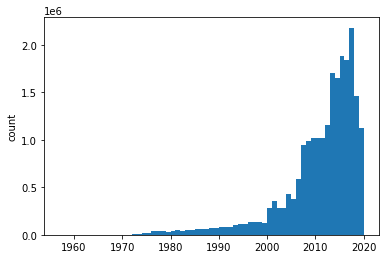

In [19]:
ph = plt.hist(ds['time_decimal'].values, bins = list(range(1957, 2020+1))) 
plt.ylabel('count')

## Subsetting the data

##### Using my externally defined functions

To create n-vertical layers of 2d-binned data (using Numpy histogram)

e.g. from this StackOverflow answer:  
https://stackoverflow.com/questions/30764955/python-numpy-create-2d-array-of-values-based-on-coordinates/30765484#30765484

In [ ]:
# # Reload my custom modules
# import importlib

# importlib.reload(ops)
# importlib.reload(nums)

In [31]:
# # Years are defined.
# year_list = [2017, 2018]

# # Vertical bins are defined.
# n_vertical = 21
# edges = np.linspace(0, 2000, n_vertical)

# def bin_multiyear():
    
#     for yr in year_list:
        
#         # Data are subset by time.
#         ds_year = ops.by_decimalyear(ds, verbose=True, start=yr, end=yr+1)
        
#         # Data are binned (using numpy histogram2d function)
#         ds_binned = ops.bin3d(ds_year, verbose=True,
#                               vertical_bin_edges=edges, n_latitude=30, n_longitude=45)

In [30]:
def bin_by_year_and_vertical(x_ds_, my_year, my_vertical_edges, n_latitude, n_longitude, my_verbose=True):
    # Data are subset by time.
    temp_ds = ops.by_decimalyear(x_ds_, verbose=my_verbose, start=my_year, end=my_year+1)
    
    # Data are binned (using numpy histogram2d function)
    temp_ds = ops.bin3d(temp_ds, verbose=my_verbose,
                        vertical_bin_edges=edges, n_latitude=n_latitude, n_longitude=n_longitude)
    
    return temp_ds

In [32]:
# Vertical bins are defined.
n_vertical = 21
edges = np.linspace(0, 2000, n_vertical)

ds_tempa = bin_by_year_and_vertical(ds, my_year=2017, my_vertical_edges=edges, n_latitude=30, n_longitude=45, my_verbose=True)
ds_tempb = bin_by_year_and_vertical(ds, my_year=2018, my_vertical_edges=edges, n_latitude=30, n_longitude=45, my_verbose=True)

Original # data points: 22,468,274
 -- subset between <start=2017 and end=2018> -- # data points: 2,181,450
 -Vertical level 1/20-
Subset # data points: 221,603
 -Vertical level 2/20-
Subset # data points: 191,643
 -Vertical level 3/20-
Subset # data points: 228,571
 -Vertical level 4/20-
Subset # data points: 157,517
 -Vertical level 5/20-
Subset # data points: 117,326
 -Vertical level 6/20-
Subset # data points: 88,690
 -Vertical level 7/20-
Subset # data points: 95,201
 -Vertical level 8/20-
Subset # data points: 44,287
 -Vertical level 9/20-
Subset # data points: 27,207
 -Vertical level 10/20-
Subset # data points: 29,425
 -Vertical level 11/20-
Subset # data points: 55,394
 -Vertical level 12/20-
Subset # data points: 17,244
 -Vertical level 13/20-
Subset # data points: 38,610
 -Vertical level 14/20-
Subset # data points: 22,997
 -Vertical level 15/20-
Subset # data points: 40,080
 -Vertical level 16/20-
Subset # data points: 15,997
 -Vertical level 17/20-
Subset # data points: 8,

In [28]:
# # Data are subset by time.
# year_choice = 2017
# ds_year = ops.by_decimalyear(ds, verbose=True, start=year_choice, end=year_choice+1)

In [29]:
# # Vertical bins are defined.
# n_vertical = 21
# edges = np.linspace(0, 2000, n_vertical)

# # Data are binned (using numpy histogram2d function)
# ds_binned = ops.bin3d(ds_year, verbose=True,
#                       vertical_bin_edges=edges, n_latitude=30, n_longitude=45)

# ds_binned

In [19]:
fp = 'test_nc_obspack_' + str(year_choice) + '_binned.nc'
ds_binned.to_netcdf(path=fp)

## Plotting

#### Base map plotting functions are defined.

In [22]:
# Set up a color scheme
levels = list(range(390, 450, 5))
cmap = plt.get_cmap('magma')
cnorm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

In [23]:
def make_my_map(projection=ccrs.PlateCarree()):
    figure, ax = plt.subplots(
        1, 1, figsize=(10,12),
        #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
        subplot_kw=dict(projection=projection)
    )

    ax.set_global()
    ax.coastlines(color='black', linewidth=0.5)
    
    # ax.coastlines(color='tab:green', resolution='10m')
    # ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    # ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')
    
    ax.add_feature(cfeature.OCEAN, facecolor='whitesmoke')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,90), 
                 linestyle='--', color='lightgray', zorder=0)
    
    return figure, ax

In [24]:
to_proj = ccrs.AlbersEqualArea(central_longitude=-97.0000, central_latitude=38.0000)

**Horizontal**

In [ ]:
# # Data are prepped.
# keep_mask = np.full(ds['value'].shape, True)
# keep_mask = keep_mask & (ds['value'] > 0)
# keep_mask = keep_mask & (ds['altitude'] < 1000)
# keep_mask = keep_mask & (ds['time_decimal'] > 2017)
# keep_mask = keep_mask & (ds['time_decimal'] <= 2018)
# #
# temp_lon = ds['longitude'].where(keep_mask)
# temp_lat = ds['latitude'].where(keep_mask)
# temp_data = ds['value'].where(keep_mask)

# # Figure is created.
# fig, ax = make_my_map(projection=ccrs.PlateCarree())

# sc = ax.scatter(temp_lon, temp_lat, 
#                 c=temp_data, cmap=cmap, norm=cnorm, edgecolors=None,
#                 s=100, alpha=0.4, transform=ccrs.PlateCarree())

# cb = fig.colorbar(pc, shrink=.8, pad=0.05, orientation='horizontal')
# cb.solids.set(alpha=1)
# cb.set_label('ppm')

# plt.show()

locator: <matplotlib.ticker.FixedLocator object at 0x7fa352cc6e80>
Using fixed locator on colorbar
Setting pcolormesh


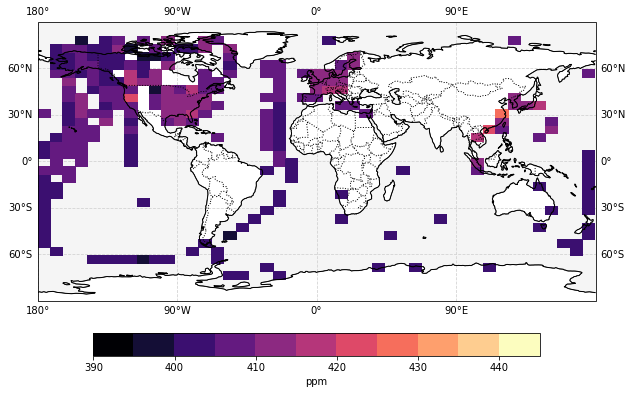

In [25]:
# Data are prepped.
keep_mask = np.full(ds_binned['value'].shape, True)
keep_mask = keep_mask & (ds_binned['value'] > 0)
keep_mask = keep_mask & (ds_binned['vertical_edges'][:,1] < 1000)
#
temp_data = ds_binned['value'].where(keep_mask).mean(dim=('vertical'))
temp_data = np.ma.masked_equal(temp_data, 0)

# Figure is created.
fig, ax = make_my_map(projection=ccrs.PlateCarree())

pc = ax.pcolormesh(ds_binned['lon'], ds_binned['lat'], temp_data, 
                   transform=ccrs.PlateCarree(),
                   cmap=cmap, norm=cnorm,
                   edgecolors=None, linestyle=':', linewidth=0.2)

cb = fig.colorbar(pc, shrink=.8, pad=0.05, orientation='horizontal')
cb.solids.set(alpha=1)
cb.set_label('ppm')

plt.show()

# plt.savefig('binned_obspack_2018_45lon-30lat-21alt.png', 
#             bbox_inches='tight', dpi=300)

**Vertical**

locator: <matplotlib.ticker.FixedLocator object at 0x7fa3535211f0>
Using fixed locator on colorbar
Setting pcolormesh


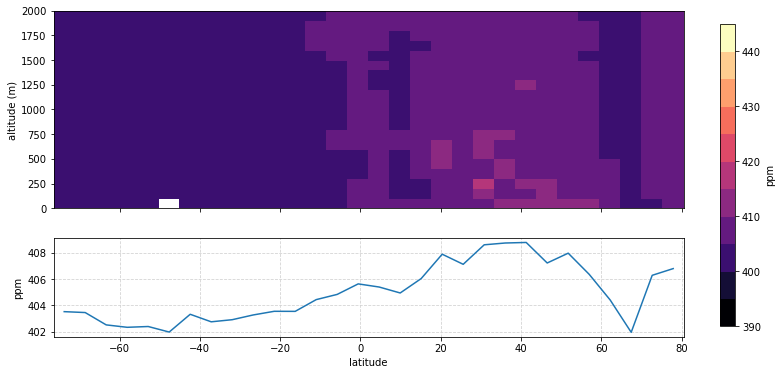

In [26]:
# Figure is created.
kw = {'height_ratios':[2,1]}
fig, axs = plt.subplots(nrows=2, figsize=(10,6), sharex='col', gridspec_kw=kw)

# Data are prepped and plotted.
temp_data = ds_binned['value'].where(ds_binned['value'] > 0).mean(dim=('lon'))
temp_data = np.ma.masked_equal(temp_data, 0)
pc = axs[0].pcolormesh(ds_binned['lat'], ds_binned['vertical'], temp_data,
                       cmap=cmap, norm=cnorm, shading='auto',
                       edgecolors=None, linestyle=':', linewidth=0.2)
axs[0].set_ylabel('altitude (m)')

# Data are prepped and plotted.
temp_data = ds_binned['value'].where(ds_binned['value'] > 0).mean(dim=('lon', 'vertical'))
temp_data = np.ma.masked_equal(temp_data, 0)
axs[1].plot(ds_binned['lat'], temp_data)
axs[1].set_xlabel('latitude')
axs[1].set_ylabel('ppm')
axs[1].grid(linestyle='--', color='lightgray')

# The colorbar is added as an additional axis.
plt.subplots_adjust(right=1)
cbar_ax = fig.add_axes([0.2, 0.15, 1, 0.7])
cb = plt.colorbar(pc, ax=cbar_ax)
cb.set_label('ppm')
cbar_ax.remove()

# plt.tight_layout()
# plt.show()
plt.savefig('binned_obspack_2018_zonal_mean.png', 
            bbox_inches='tight', dpi=300)

In [ ]:
# Data are prepped.
temp_data = ds_binned['value'].where(ds_binned['value'] > 0).mean(dim=('lon', 'vertical'))
# temp_data = ds_sub['value'].where(ds_sub['upperzbnd'] < 101).mean(dim=('upperzbnd'))
temp_data = np.ma.masked_equal(temp_data, 0)

# Figure is created.
figure, ax = plt.subplots(figsize=(10,6))

pc = ax.plot(ds_binned['lat'], temp_data,
             linestyle='-')

plt.show()

In [ ]:
asdkjhgasd

## Interpolations to a grid

In [ ]:
bbox = [np.floor(lon.min().values.item()), 
        np.ceil(lon.max().values.item()),
        np.floor(lat.min().values.item()),
        np.ceil(lat.max().values.item())]
bbox

#### Using MetPy's `interpolate_to_grid()`

In [ ]:
data_var = ds.metpy.parse_cf('value')

gx, gy, img = interpolate_to_grid(lon, lat, dat, interp_type='natural_neighbor', hres=10)

In [ ]:
img = np.ma.masked_where(np.isnan(img), img)

In [ ]:
def basic_map(proj, title):
    """Make our basic default map for plotting"""
    fig = plt.figure(figsize=(15, 10))
    # add_metpy_logo(fig, 0, 80, size='large')
    view = fig.add_axes([0, 0, 1, 1], projection=proj)
    view.set_title(title)
    view.set_extent([-120, -70, 20, 50])
    view.add_feature(cfeature.STATES.with_scale('50m'))
    view.add_feature(cfeature.OCEAN)
    view.add_feature(cfeature.COASTLINE)
    view.add_feature(cfeature.BORDERS, linestyle=':')
    return fig, view

In [ ]:
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])

def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.add_feature(LAND, facecolor='0.75')
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [ ]:
img = np.ma.masked_where(np.isnan(img), img)

In [ ]:
# fig, view = basic_map(to_proj, 'Linear')
# fig, view = make_map(bbox=[-180, 180, -90, 90], projection=ccrs.PlateCarree())
fig, view = make_my_map()

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=cnorm)
sc = view.scatter(lon.values, lat.values, c=dat.values, alpha=0.4, 
                   cmap=cmap, norm=cnorm, edgecolors='gray',
                   transform=ccrs.PlateCarree())
fig.colorbar(mmb, shrink=.4, pad=0.05, boundaries=levels, orientation='horizontal')

### Trying to use pyinterp

In [ ]:
import pyinterp

x_axis = pyinterp.Axis(ds_sub.variables["longitude"][:], is_circle=True)
y_axis = pyinterp.Axis(ds_sub.variables["latitude"][:])

### Trying to use scipy

In [ ]:
from scipy.interpolate import griddata
import numpy.ma as ma

In [ ]:
# define grid.
print(f"boundary box: {bbox}")
lonspacing = 10
xi = np.arange(bbox[0], 
               my_round(bbox[1], nearest=lonspacing, dir='up')+1, 
               lonspacing)
latspacing = 10
yi = np.arange(bbox[2],
               my_round(bbox[3], nearest=latspacing, dir='up')+1,  
               latspacing)
print(f"shape of interpolation grid: {(xi.shape, yi.shape)}")

In [ ]:
# grid the data.
zi = griddata((lon, lat), dat, (xi[None,:], yi[:,None]), method='nearest')
npts = len(dat)

zi = np.ma.masked_invalid(zi)

In [ ]:
fig, ax = make_my_map(projection=ccrs.PlateCarree())

# contour the gridded data, plotting dots at the randomly spaced data points.
CS = ax.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = ax.contourf(xi, yi, zi, 15, cmap=cmap, norm=cnorm)

# plot data points.
# plt.scatter(lon, lat, marker='o',c='b',s=5)
# sc = ax.scatter(lon.values, lat.values, c=dat.values, alpha=0.4, 
#                 cmap=cmap, norm=cnorm, edgecolors='gray')
sc = ax.scatter(lon.values, lat.values, c=dat.values, alpha=0.4, 
                   cmap=cmap, norm=cnorm, edgecolors='gray',
                   transform=ccrs.PlateCarree())


fig.colorbar(CS, shrink=.8, pad=0.05, orientation='horizontal')

plt.title('griddata test (%d points)' % npts)
plt.show()

## Try a cross-section

In [ ]:
from metpy.interpolate import cross_section

In [ ]:
ds_sub = ds_sub.metpy.parse_cf().squeeze()

In [ ]:
start = (37.0, 65.0)
end = (35.5, 105.0)

In [ ]:
cross = cross_section(ds_sub, start, end)  #.set_coords(('latitude', 'longitude'))
print(cross)

## Plot

In [ ]:
# Turn interactive plotting off
plt.ioff()

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

Are the observations all from the same elevation and location?

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))

axs[0].plot(ds['elevation'], label='elevation')
axs[1].plot(ds['latitude'], label='lat')
axs[2].plot(ds['longitude'], label='lon')
for ax in axs:
    ax.legend()

What do the CO2 values look like?

In [ ]:
# ---- Set up Figure ----
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(12, 12))

# ---- Plot ----
ax.scatter(ds['time'], ds['value'], marker='o')  #, label='$value$')

# ---- Set up figure properties ----
ax.set_ylabel(f"{ds['value'].attrs['units']}")
ax.set_title(f"{ds['value'].attrs['long_name']}")